[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/4_ex_data_prep.ipynb) 

# BADS Exercise 4 on data preparation
This exercise revisit some of the concepts covered in [Tutorial 4 on data preparation](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb). That tutorial was rather comprehensive and provided a lot of materials and codes associated with typical tasks in the wide scope of data preparation. Therefore, the exercises will not go beyond [Tutorial 4](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb). Rather, we will consider a different data set and repeat some standard data prep. tasks for that data set.   

## 1 Loading the data 
The data set for this tutorial comes from the classic Book Credit Scoring and its Applications by Lyn C. Thomas, David B. Edelman, and Jonathan N. Crook. You can obtain the data, called *loan_data* from our [GitHub repository](https://github.com/Humboldt-WI/bads/tree/master/data). The data folder of the repository also provides a file *loan_data_dictionary*, which offers a brief description of the features in this data set. In a nutshell, the data represents yet another vanilla credit scoring task with a binary target variable, indicating whether bank customers repaid their debt or defaulted, and a few features characterizing credit applicants. Your first task is to load the data into a `Pandas DataFrame`.

In [6]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# Some configuration of the plots we will create later
%matplotlib inline  
plt.rcParams["figure.figsize"] = (12,6)

import pandas as pd 

# Load the data (either from disk or directly from the web)

# Load the data directly from GitHub
data_url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/loan_data.csv'
df = pd.read_csv(data_url,sep=';')
df

,YOB,nKIDS,nDEP,PHON,dINC_SP,EMPS_A,dINC_A,RES,dHVAL,dMBO,dOUTM,dOUTL,dOUTHP,dOUTCC,BAD
0,19.0,4.0,0.0,1,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,1,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,1,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,1,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,1,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52.0,4.0,1.0,1,0.0,V,37764.0,U,0.0,0.0,0.0,340.0,0.0,0.0,0.0
1221,56.0,3.0,0.0,1,1200.0,P,31500.0,O,6928.0,46464.0,784.0,256.0,0.0,0.0,1.0
1222,60.0,0.0,0.0,1,0.0,E,46800.0,O,11392.0,928.0,1144.0,680.0,0.0,108.0,0.0
1223,20.0,0.0,0.0,1,0.0,R,0.0,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0


By now, you have run through the process of getting a first idea about a new data set many times. You have seen examples in previous tutorials and have written your own codes in, e.g., the third exercise on predictive analytics. Nonetheless, draw once more on your experience and take a quick look into the data.  

In [7]:
# Some space for any code you want to write to take a first look
# Query some properties of the data
print('Dimensionality of the data is {}'.format(df.shape))  # .shape returns a tupel
print('The data set has {} cases.'.format(df.shape[0]))     # I can also index the elements of that tupel
print('The total number of elements is {}.'.format(df.size))

df.info()
#there is no non-null data, and I could adjust the type later
#except for the EMPS_A,RES,PHON others are numeric

Dimensionality of the data is (1225, 15)
The data set has 1225 cases.
The total number of elements is 18375.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YOB      1225 non-null   float64
 1   nKIDS    1225 non-null   float64
 2   nDEP     1225 non-null   float64
 3   PHON     1225 non-null   int64  
 4   dINC_SP  1225 non-null   float64
 5   EMPS_A   1225 non-null   object 
 6   dINC_A   1225 non-null   float64
 7   RES      1225 non-null   object 
 8   dHVAL    1225 non-null   float64
 9   dMBO     1225 non-null   float64
 10  dOUTM    1225 non-null   float64
 11  dOUTL    1225 non-null   float64
 12  dOUTHP   1225 non-null   float64
 13  dOUTCC   1225 non-null   float64
 14  BAD      1225 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 143.7+ KB


In [ ]:
# Produce summary statistics (to R-programmers: this is equivalent to the famous R function summary())
df.describe()


## 2 Data types
You can tell from the data dictionary that the loan data includes numeric and categorical variables. Draw on the examples from [Tutorial 4](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb) and make sure that all numeric features are stored as `float32` and all categorical features are stored as categories in your DataFame

In [8]:
# Conversion of data types where needed

# Code categories properly 
df['EMPS_A'] = df['EMPS_A'].astype('category')
df['RES'] = df['RES'].astype('category')

#cat_features = ['EMPS_A', 'RES']
#for var in cat_features:
#  df[var] = df[var].astype('category')

# The target variable and PHON has only two states so that we can store it as a boolean
df['BAD'] = df['BAD'].astype('bool')
df['PHON'] = df['PHON'].astype('bool')

# let's change all numeric variables from float64 to float32 to reduce memory consumption
num_vars = df.select_dtypes(include=np.float64).columns
df[num_vars] = df[num_vars].astype(np.float32)

df.info()  # verify the conversion was successful

# In the solution: 
# Note that PHON is a binary feature taking values 0 and 1, which is stored as `int64`,
# whereas BAD is also a binary column encoded as `float64`. It is common practice to 
# encode binary features as numeric because it is convenient to perform different
# calculations (for instance, computing mean). At the same time, it is also possible
# to encode binary features as `bool` taking values True and False. For now, we will
# stick to the numeric encoding and convert PHON to `float32`.

# Identify list of continuous features
#con_features = [var for var in df.columns if var not in cat_features]

# Encode continuous features
#for var in con_features:
#  df[var] = df[var].astype('float32')

# Verify the conversion was successful
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   YOB      1225 non-null   float32 
 1   nKIDS    1225 non-null   float32 
 2   nDEP     1225 non-null   float32 
 3   PHON     1225 non-null   bool    
 4   dINC_SP  1225 non-null   float32 
 5   EMPS_A   1225 non-null   category
 6   dINC_A   1225 non-null   float32 
 7   RES      1225 non-null   category
 8   dHVAL    1225 non-null   float32 
 9   dMBO     1225 non-null   float32 
 10  dOUTM    1225 non-null   float32 
 11  dOUTL    1225 non-null   float32 
 12  dOUTHP   1225 non-null   float32 
 13  dOUTCC   1225 non-null   float32 
 14  BAD      1225 non-null   bool    
dtypes: bool(2), category(2), float32(11)
memory usage: 58.1 KB


## EDA
### 3.1 Histogram
The data includes a feature dINC_A, which captures the income of a credit applicant. We would expect that this feature is related to our target variable, which is called BAD in the data set. 

Create a histogram plot of the income feature and examine its distribution.

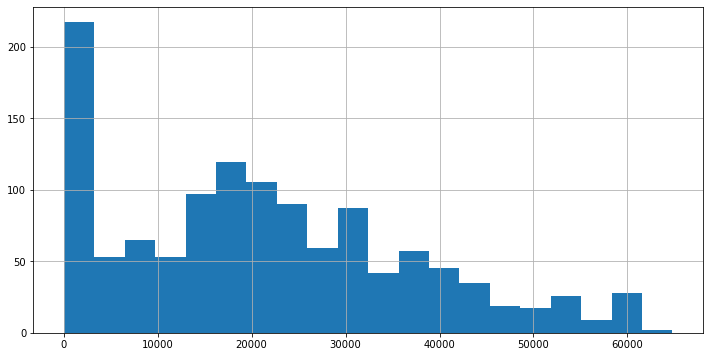

In [9]:
# Histogram of dINC_A 
df['dINC_A'].hist(bins=20)


# except for missing values, we could conclude that its distribution is right-tail.

# Histogram reveals that there is a large portion of applicants (more than 200) with 
# no income. The rest is distributed between 0 and about 65.000, with most values 
# lying between 5.000 and 35.000. We also see that the right tail of distribiton
# is rather long, indicating that the number of applicants earning at least X tends
# to gradually decrease when X goes above 25.000 and higher.


The distribution reveals some potentially important insights. However, the histogram alone does not suffice to check our intuition that income and credit risk are related. To that end, let's examine the income distribution across good and bad credit applications.

### 3.2 Analysis of the dependency between applicants' income and credit risk
We begin with a manual approach, which also allows us to revisit logical indexing in Python and Pandas. Calculate the average income of a credit applicant for good risks and for bad risks.

In [10]:
df.groupby("BAD")['dINC_A'].mean()

BAD
False    23008.642578
True     16316.913086
Name: dINC_A, dtype: float32

Remember that the Pandas function `value_counts()` allows you to perform an analysis similar to your above calculation of the group-wise means. Replicate the previous calculation using `value_counts()`.  

In [11]:
# Function value_counts()

df.groupby("BAD")['dINC_A'].sum()/df.BAD.value_counts()


BAD
False    23008.643016
True     16316.913313
dtype: float64

Next, we perform a graphical analysis. Depict the distribution of the income of customers with a good and bad risk, respectively, by means of a box-plot.

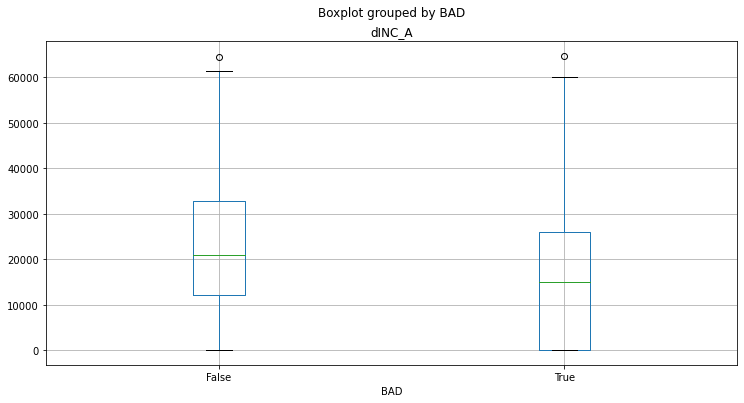

In [12]:
# Box plot

#vertical
#for i in (0,1):
#    plt.figure(i)
#    df[df['BAD']==i].boxplot(column='dINC_A')

#horizontal
df.boxplot(column='dINC_A',by = "BAD")

In [ ]:
# Comparison of mean values and box plots confirms our intuition that BAD risks tend
# to have lower income than GOOD risks. Remember that boxes visualize the upper 
# and lower quartiles of a feature distribution. In our case, we observe that 
# half of the GOOD applicants have income between about 12.000 and 32.000, whereas
# half of the BAD risks have income between 0 and 26.000.

### 3.3 Statistical testing
Identify an appropriate statistical test to verify whether the observed income difference between good and bad applicants is statistically significant. Perform the test and display its results. Hint: A web-search similar to “statistical test difference in means python” will help.

In [13]:
# One way to perform statistical testing of mean differences is a two-sided t-test.
# T-test checks the null hypothesis that two independent samples have identical average 
# (expected) values. In Python, t-test is implemented in several packages. The most 
# popular implementation is probably `ttest_ind()` that is part of the `scipy.stats` 
# package. Let's check the function documentation:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# Note that the two-sided t-test assumes equal variance within the samples by default.
# To run the correct version of the t-test (default or adjusted for unequal variances),
# we first need to check this assumption. One way to do that is to run a Levene test 
# for equal variances, which has the null hypothesis that variances within the samples
# are equal. If the Levene test rejects the null hypothesis, we can perform statistical 
# testing of mean differences using Welch’s t-test modification, which does not assume
# equal population variance, instead of the standrad t-test. This can be done simply 
# by specifying equal_var = False in the `ttest_ind() function`.

# Let's run the Levene test first:
from scipy import stats
stats.levene(df.loc[df['BAD'] == 0]['dINC_A'], # good risks
             df.loc[df['BAD'] == 1]['dINC_A']) # bad risks

# The `levene()` function returns the test statistic and its p-value. If you need 
# to refresh you memory on p-values, you can check out this post:
# https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8A 

# In our case, Levene test does not reject the null hypothesis that variances are equal.
# This means that we can perform a standard two-sided t-test.


LeveneResult(statistic=0.034214288195485554, pvalue=0.8532824134210151)

In [14]:
# Statistical testing of mean differences
#from scipy import stats
stats.ttest_ind(df['dINC_A'][df['BAD']==0],df['dINC_A'][df['BAD']==1])
# p-value is less than 0.05, which means the observed income difference between
# good and bad applicants is statistically significant.

# A very small p-value of the t-test suggests that we can reject the null hypothesis 
# at a reasonable level of signicance. This result indicates that the difference 
# in incomes between GOOD and BAD applicants is indeed statistically significant.

Ttest_indResult(statistic=6.6040866243773175, pvalue=5.950120052144809e-11)

### 3.4 Categorical variables
The data set comprises three categorical features. The feature PHON is binary and will not cause any issues. The features EMPS_A and RES are more interesting. Remember to check the data dictionary to understand what information the features encode. 

In the lecture, we explained that categorical features are typically encoded using dummy variables prior to applying an analytical model. Python supports dummy coding in several ways.  Pandas offers a function `get_dummies()` and sklearn offer a class `OneHotEncoder()`. The Pandas approach is maybe a bit easier to use. The more prevalent approach in practice is to rely on sklearn. 

Check the documentation of one or both of the above functions. Then create dummy variables for the feature RES and add them to your DataFrame.   

In [15]:
import sklearn as sk
# Dummy coding of RES
#help(pd.get_dummies)
dummy_RES = pd.get_dummies(df['RES'],prefix='RES')
df_d =pd.concat([df, dummy_RES], join= 'inner', axis=1)
df_d
#from sklearn.preprocessing import OneHotEncoder
#help(OneHotEncoder)


#df_with_dummies = pd.get_dummies(df, columns = ['RES'])
#print(df_with_dummies.shape)
#df_with_dummies.head()

,YOB,nKIDS,nDEP,PHON,dINC_SP,EMPS_A,dINC_A,RES,dHVAL,dMBO,dOUTM,dOUTL,dOUTHP,dOUTCC,BAD,RES_F,RES_N,RES_O,RES_P,RES_U
0,19.0,4.0,0.0,True,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,False,0,0,1,0,0
1,41.0,2.0,0.0,True,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,False,0,0,1,0,0
2,66.0,0.0,0.0,True,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0
3,51.0,2.0,0.0,True,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,False,0,0,1,0,0
4,65.0,0.0,0.0,True,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,52.0,4.0,1.0,True,0.0,V,37764.0,U,0.0,0.0,0.0,340.0,0.0,0.0,False,0,0,0,0,1
1221,56.0,3.0,0.0,True,1200.0,P,31500.0,O,6928.0,46464.0,784.0,256.0,0.0,0.0,True,0,0,1,0,0
1222,60.0,0.0,0.0,True,0.0,E,46800.0,O,11392.0,928.0,1144.0,680.0,0.0,108.0,False,0,0,1,0,0
1223,20.0,0.0,0.0,True,0.0,R,0.0,N,0.0,0.0,0.0,0.0,0.0,0.0,True,0,1,0,0,0


In [16]:
# Option 2: dummy coding of RES using `OneHotEncoder()`
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

# Applying sklearn encoders involves several steps:
# - initializing the encoder and specifying its properties
# - fitting the encoder to the data
# - transforming the data using the encoder
# - [if applied to specific columns] merging the result to the original data

# Initializing
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore', # treatment of unknown categories
                    sparse         = False)    # whether to return numpy array or sparse matrix

# Fitting encoder to a specific column. If we supply the whole dataframe, the 
# encoder will fit and then transform all columns. We only want to change one.
enc.fit(df[['RES']])

# Transforming the data / column
df_transformed = enc.transform(df[['RES']])

# Merging dummies to the data with `join()`. Note that the output of the sklearn 
# encoders is a numpy array or a sparce matrix. If necessary, you would need to 
# convert the array back to pandas dataframe. This is what we do below.
df_transformed = pd.DataFrame(df_transformed, 
                              columns = enc.get_feature_names()) # dummy names
df_with_dummies_2 = df.join(df_transformed)

# Deleting original variable
del df_with_dummies_2['RES']
print(df_with_dummies_2.shape)
df_with_dummies_2.head()

# As you can see, pandas `get_dummies()` approach is much simpler. However, learning
# the logic behind sklearn processors is very useful as there are many different 
# processors that can be applied to a data set using the same pipeline. 

(1225, 19)


,YOB,nKIDS,nDEP,PHON,dINC_SP,EMPS_A,dINC_A,dHVAL,dMBO,dOUTM,dOUTL,dOUTHP,dOUTCC,BAD,x0_F,x0_N,x0_O,x0_P,x0_U
0,19.0,4.0,0.0,True,0.0,R,0.0,14464.0,4.0,0.0,0.0,0.0,0.0,False,0.0,0.0,1.0,0.0,0.0
1,41.0,2.0,0.0,True,0.0,P,36000.0,0.0,0.0,280.0,664.0,0.0,80.0,False,0.0,0.0,1.0,0.0,0.0
2,66.0,0.0,0.0,True,0.0,N,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0,0.0,0.0
3,51.0,2.0,0.0,True,0.0,P,464.0,24928.0,8464.0,584.0,320.0,0.0,60.0,False,0.0,0.0,1.0,0.0,0.0
4,65.0,0.0,0.0,True,0.0,P,15000.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,1.0,0.0


The feature EMPS_A has more distinct levels. Considering the previous task, it is obvious that dummy coding the feature will increase dimensionality substantially. To avoid this, it makes sense to **regroup** the category levels prior to dummy coding. 

In the lecture on data preparation, we argued that a pivot table helps to identify category levels that we can merge. Specifically, we were recommending merging category levels for which the odds-ratio (i.e., the ratio of goods to bads) is similar. Write code to calculate the odds ratio for each level of the feature EMPS_A

In [17]:
# Calculation of the odds-ratio for EMPS_A
odd_EMPS_A = pd.crosstab(df.BAD, df.EMPS_A)

ratio = pd.DataFrame(index = ['odd_ratio'],columns = odd_EMPS_A.columns)

for i , col in enumerate(odd_EMPS_A.columns):
    #print(i)
    ratio.iloc[:,i] = round(odd_EMPS_A.iloc[:,i][0]/odd_EMPS_A.iloc[:,i][1],2)

pd.concat([odd_EMPS_A, ratio], join= 'inner', axis=0)

#help(pd.crosstab)

# Creating cross-tab of EMPS_A and BAD
#res = pd.crosstab(df['EMPS_A'], df['BAD'])

# Computing odds ratio
#res['odds_ratio'] = res[0] / res[1]

# Displaying the output
#res

EMPS_A,B,E,M,N,P,R,T,U,V,W,Z
False,22.00,88,17,5,413,55,86,4,187,21,4
True,8.00,36,6,1,118,49,37,4,44,16,4
odd_ratio,2.75,2.44,2.83,5,3.5,1.12,2.32,1,4.25,1.31,1


In [ ]:
# Let's sort the results by odds ratio:
#res = res.sort_values('odds_ratio')
#res

# As you can see, some values of EMPS_A have the same odds ratio (U and Z). Some
# other values also have a similar ratio (e.g., B and M).

Now merge some category levels based on your solution to the previous task.  

In [18]:
# From above we could see that B(public sector), E(self employed), M(military), T(student) could be merged;
# N(others) alone is one level; P(private sector) alone is one level; V(Government) alone is one level;
# R(retired), U(unemployed), W(housewife) and Z(no response) could be merged

# Merge category levels from EMPS_A
df['EMPS_A_Dummy'] = '1' #set default value to +1 for new variable 
df.loc[(df['EMPS_A'] == 'N'), 'EMPS_A_Dummy'] = '5' 
df.loc[( (df['EMPS_A'] == 'V')), 'EMPS_A_Dummy'] = '4'
df.loc[(df['EMPS_A'] == 'P') , 'EMPS_A_Dummy'] = '3'
df.loc[((df['EMPS_A'] == 'B') | (df['EMPS_A'] == 'E') | (df['EMPS_A'] == 'M') | (df['EMPS_A'] == 'T')), 'EMPS_A_Dummy'] = '2'
df['EMPS_A_Dummy'] = df['EMPS_A_Dummy'].astype('category')  # convert to categorical
df.EMPS_A_Dummy.value_counts()

3    531
2    300
4    231
1    157
5      6
Name: EMPS_A_Dummy, dtype: int64

In [ ]:
# Based on the previous results, we can merge some levels of EMPS_A with each other
# if they have a similar odds ratio. One solution could be to do the following encoding:
# - level 1: ['U', 'Z', 'R', 'W']
# - level 2: ['T', 'E', 'B', 'M']
# - level 3: ['P', 'V']
# - level 4: ['N']

# How to do the merging? Let's start by setting up a renaming dictionary
#remap_dict = {
#    'U': 'U+Z+R+W',
#    'Z': 'U+Z+R+W',
#    'R': 'U+Z+R+W',
#    'W': 'U+Z+R+W',
#    'T': 'T+E+B+M',
#    'E': 'T+E+B+M',
#    'B': 'T+E+B+M',
#    'M': 'T+E+B+M',
#    'P': 'P+V',
#    'V': 'P+V',
#    'N': 'N'}

# Now we can use `.map()` to merge category levels according to the dictionary
#df['EMPS_A_merged'] = df['EMPS_A'].map(remap_dict).astype('category')

# Checking value counts
#df['EMPS_A_merged'].value_counts()

The advantage of merging category levels is that we need less dummy variables for encoding the feature. On the other hand, by reducing category levels, we run the risk of losing information. It would make sense to check that our previous merging of category levels did not hurt, e.g., was not too aggressive. Why aggressive? Well, imagine you merge all category levels into one level. This would render the feature useless. So there is a trade-off between having few levels, to not increase dimensionality, and not having too few levels, to sustain the information in the feature for distinguishing good and bad applicants. To find a healthy balance between these conflicting objectives, we need a measure that tells us whether a grouping is informative. It turns out that a well-known statistical test, namely the $\chi^2$ test, provides this functionality. 
- Run a quick web search to revisit the $\chi^2$ test and understand how it is useful for judging a grouping of EMPS_A in our context.
- Identify a way to calculate the $\chi^2$ test statistic in Python
- Calculate the test statistic for the original version of EMPS_A with 11 levels and the new version with less levels (i.e., solution to previous task)
- Based on the results, conclude which encoding of EMPS_A is more suitable. 


In [19]:
# Chi^2 testing

from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(odd_EMPS_A)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

totalchi = pd.DataFrame(data = [[dof,prob,critical,stat]],index = [str(len(df.EMPS_A.unique()))],columns = ['dof','prob','critical','stat'])
totalchi

dof=10
[[ 22.08979592  91.3044898   16.9355102    4.41795918 390.98938776
   76.57795918  90.56816327   5.89061224 170.09142857  27.24408163
    5.89061224]
 [  7.91020408  32.6955102    6.0644898    1.58204082 140.01061224
   27.42204082  32.43183673   2.10938776  60.90857143   9.75591837
    2.10938776]]
probability=0.950, critical=18.307, stat=45.784
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


,dof,prob,critical,stat
11,10,0.95,18.307038,45.784308


In [20]:
odd_EMPS_A_Dummy = pd.crosstab(df.BAD, df.EMPS_A_Dummy)

stat, p, dof, expected = chi2_contingency(odd_EMPS_A_Dummy)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# The second encoding of EMPS_A is more suitable. Because the stat is almost the same,
# but the critical value largely decreases

dof=4
[[115.60326531 220.89795918 390.98938776 170.09142857   4.41795918]
 [ 41.39673469  79.10204082 140.01061224  60.90857143   1.58204082]]
probability=0.950, critical=9.488, stat=45.202
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
# Chi^2 testing of categorical features can be performed with `chi2_contingency()`
# from `scipy.stats`. The documentation is provided at:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

# Importing packages
#from scipy.stats import chi2_contingency

# Testing the original EMPS_A encoding
# Note that `chi2_contingency()` return 4 values: test statistic, p-value, degrees 
# of freedom, expected frequencies. We only need the test statistic and can ignore
# the rest. Using _ as a name of the variable to save the output of a function implies
# that we ignore this output and do not store it in the memory.
#ct_orig = pd.crosstab(df['BAD'], df['EMPS_A'])
#stat_orig, _, _, _ = chi2_contingency(ct_orig)

# Testing the modified EMPS_A encoding
#ct_merged = pd.crosstab(df['BAD'], df['EMPS_A_merged'])
#stat_merged, _, _, _ = chi2_contingency(ct_merged)

# Comparing test results
#print('Chi-square statistic (original): {:.4f}'.format(stat_orig))
#print('Chi-square statistic (encoded):  {:.4f}'.format(stat_merged))

# You can take the following read for more details on Chi^2 tests:
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

**Optional**
By solving the previous task, you created a rather powerful mechanism to regroup categorical variables and optimize the number of levels prior to applying dummy coding. Write a function that wraps-up this functionality. In particular, your function should:
- receive a categorical variable as input
- check that the variable is actually a category
- determine the number of unique levels
- iteratively reduce the number of levels by 
  - calculating the odds-ratio of all current levels
  - and merging the two levels whose odds ratio is most similar
  - calculate the $\chi^2$ statistic for the current grouping and store its value
- Identify the best grouping of the categorical variable

In [21]:
def getTwoClosestElements(arr):
    ratio_n = []
    position = []

    arr_new = arr.T.sort_values(by = 'odd_ratio').T
    
    
    for i,v in enumerate(arr_new):
        ratio_n.append(arr_new[v].odd_ratio)
        position.append(v)#draw the value from pd.dataframe as list

    seq = sorted(ratio_n) #sort

    dif = float('inf') #set ∞
    
    # Traverse all the elements, compare them in pairs, compare the difference between adjacent elements
    for i,v in enumerate(seq[:-1]):#i, v are elements in the sorted list seq, where i and v are adjacent
        #print(i,v)
        d = abs(v - seq[i+1])           #sorting method: the absolute value of the value obtained by
        #print(d)                        #subtracting the previous element from the following element is d
        if d < dif:
            first,first_p, second, second_p, dif = v, i ,seq[i+1], i+1, d 
        #d stores the absolute value of the difference between the two numbers, which is used to continue to compare
        #the difference, find the smallest difference, where seq[:-1] is inverted, so v is first, seq[i+1] is behind
    return(position[first_p],first,position[second_p], second,dif)                    #Return the two elements with the smallest difference

In [22]:
# Solution to the optional task

# receive a categorical variable as input
# I found that we should input our target values as well, rather we could not get the odd-ratio
x = df.EMPS_A.copy()
y = df.BAD.copy()
z = pd.concat([x, y], join= 'inner', axis=0)

# check that the variable is actually a category
if x.dtype == 'category':
    print('The variable is actually a category')
else:
    print('The variable is not actually a category, now we change it')
    x = x.astype('category')

# determine the number of unique levels
chi = pd.DataFrame(columns = ['dof','prob','critical','stat'])

for j,p in enumerate(x.unique()):
    odd_x = pd.crosstab(y, x)

    stat, p, dof, expected = chi2_contingency(odd_x)

    # store test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    chi_n = pd.DataFrame(data=[[dof,prob,critical,stat]],index = [str(dof+1)],columns = ['dof','prob','critical','stat'])
    chi = chi.append(chi_n)
        # iteratively reduce the number of levels by
        # calculating the odds-ratio of all current levels
        #odd_x = pd.crosstab(y, x)

    ratio = pd.DataFrame(index = ['odd_ratio'],columns = odd_x.columns)

    for i , col in enumerate(odd_x.columns):
            #print(i)
        ratio.iloc[:,i] = round(odd_x.iloc[:,i][0]/odd_x.iloc[:,i][1],2)

        #table = pd.concat([odd_x, ratio], join= 'inner', axis=0)
        #print(table)

        # merging the two levels whose odds ratio is most similar
    if len(ratio.columns)<=2:
        break
    else:
        first_p,first,second_p, second,dif = getTwoClosestElements(ratio)
    x.loc[(x == second_p)] = first_p

    
    

    # calculate the  𝜒2  statistic for the current grouping and store its value
    
    
    #if abs(stat) >= critical:
    #    print('Dependent (reject H0)')
    #else:
    #    print('Independent (fail to reject H0)')
    #chi
chi
#chi['critical']
#def optimize_grouping(x):
#    print(ty)
    

The variable is actually a category


,dof,prob,critical,stat
11,10,0.95,18.307038,45.784308
10,9,0.95,16.918978,45.784308
9,8,0.95,15.507313,45.782055
8,7,0.95,14.067140,45.722624
7,6,0.95,12.591587,45.687623
6,5,0.95,11.070498,45.423684
5,4,0.95,9.487729,45.202144
4,3,0.95,7.814728,44.366553
3,2,0.95,5.991465,37.724315
2,1,0.95,3.841459,36.403259


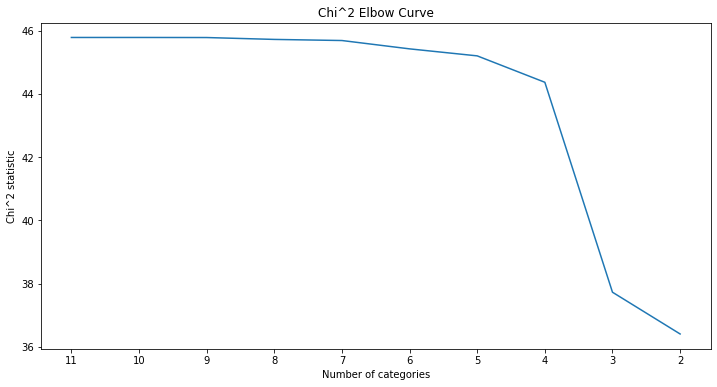

In [26]:
import matplotlib.pyplot as plt

plt.plot(chi.index, chi.stat)
plt.title('Chi^2 Elbow Curve')
plt.ylabel('Chi^2 statistic')
plt.xlabel('Number of categories')
plt.show()

In [220]:
chi['stat']-chi['critical']
#because when the grouping number is 4, the distance between critical value and statistic is largest, the optimal 
#number of grouping is 4

# The output suggests that reducing the number of categories from 11 to 4 allows to
# preserve most of the information. The suggested endcoing ['N' 'U+Z+R+W' 'T+E+B+M' 'P+V']
# corresponds to our encoding selected in the previous task, which is good news :)
# Further reducing the number of categories to 3 or 2 results in a rather sharp drop
# in the Chi^2 test statistic, which suggests that stopping at 4 appears to be a 
# good solutiion. Well done!

11    27.477270
10    28.865331
9     30.274742
8     31.655484
7     33.096036
6     34.353186
5     35.714415
4     36.551825
3     31.732851
2     32.561801
dtype: float64

# Well done. You did great in solving all the exercises!